In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

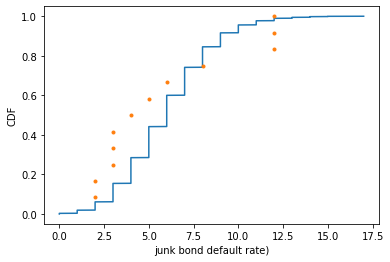

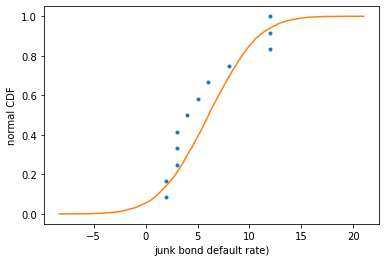

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


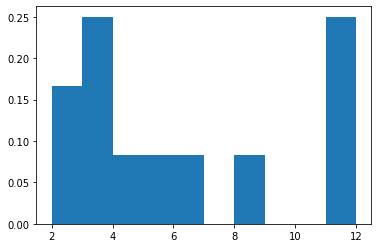

In [14]:
#Junk bond default rates
year=[1984,1988,1992,1996,2000,2002,2004,2008,2010,2012,2016,2020]
data=[3,3,12,4,8,12,6,2,12,3,5,2]

dictionary={"year":year, "data":data}
df=pd.DataFrame(dictionary,columns=['year','data'])
#df.reindex(['year'],axis='columns')

#junk bond default rate
data=df['data'].tolist()

mean= np.mean(data)
std=np.std(data)
samples = np.random.poisson(mean, size=10000)
x,y=ecdf(data)
x_theor,y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('junk bond default rate)')
_ = plt.ylabel('CDF')
plt.show()

#normal distribution
samples= np.random.normal(mean,std, size=10000)
x_norm,y_norm=ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_norm, y_norm)
_ = plt.xlabel('junk bond default rate)')
_ = plt.ylabel('normal CDF')
plt.show()


_ = plt.hist(data,bins=10, normed=True)
plt.show()


In [15]:
#x1=1992-1984
#print(x1)
#x2=2002-1992
#print(x2)
#x3=2010-2002
#print(x3)

exp_data=df[df['data']>10]
exp_data=exp_data.reset_index(drop=True)
#exp_data=exp_data.reindex(['year'],axis='columns')

print (exp_data)
minYear=df['year'].min()

year_span=[]

for index,row in exp_data.iterrows():
    if (index==0):
        year_span.append(row['year']-minYear)
    else:
        previous_year=exp_data.iloc[index-1,0]
        year_span.append(row['year']-previous_year)

#exponential distribution of the junk bond market
print(year_span)

   year  data
0  1992    12
1  2002    12
2  2010    12
[8, 10, 8]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


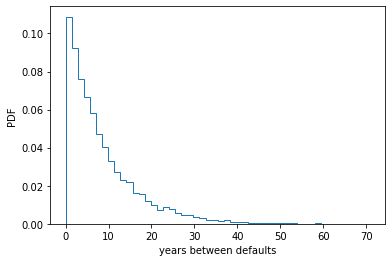

In [16]:
np.random.seed(42)
tau= np.mean(year_span)
inter_default_time= np.random.exponential(tau,10000)
_ = plt.hist(inter_default_time,
             bins=50, normed=True, histtype='step')
_= plt.xlabel('years between defaults')
_= plt.ylabel('PDF')
plt.show()

[ 6  8 12 12 12  8 12 12  2 12  4  4]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


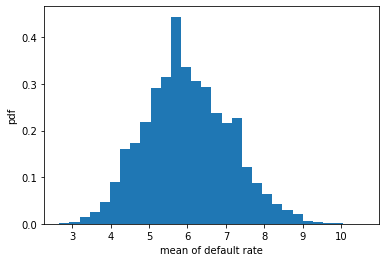

[3.91666667 8.33333333]


In [29]:
def bootstrap_replicate_1d(data, func):
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)


data=np.array(df['data'])
#print(data)
samples=np.random.choice(data,size=data.size)
print(samples)

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(data, np.mean)

_=plt.hist(bs_replicates,bins=30, normed=True)
_=plt.xlabel('mean of default rate')
_=plt.ylabel('pdf')
plt.show()

confidence_interval=np.percentile(bs_replicates,[2.5,97.5])
print(confidence_interval)


